Nama: Himam Bashiran (2311110055)

Diberikan data test untuk kasus unguided praktikum minggu ini, lakukan identifikasi pada data tersebut apakah terdapat perbedaan karakteristik data train pada praktikum sebelumnya.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

In [2]:
train_features = pd.read_csv("train_features.csv")
train_labels = pd.read_csv("train_labels.csv")
df_train = pd.concat([train_features, train_labels], axis=1)
df_test = pd.read_csv('test_features.csv')

In [3]:
print("Informasi data train: ")
print(df_train.info())

print("\nInformasi data test: ")
print(df_test.info())

Informasi data train: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  k

Pertama, saya melihat terlebih dahulu informasi dari tiap dataset, baik data train maupun data test. Disini terdapat sedikit perbedaan antara kedua dataset ini. Pada data train terdapat nilai target yaitu jumlah_promosi tetapi di data test tidak tersedia. Hal tersebut bertujuan untuk melatih model menggunakan data train yang selanjutnya model akan ditugaskan untuk memprediksi nilai target menggunakan data test.

In [4]:
print("Informasi distribusi statistik variabel numerik data train: ")
df_train.describe()

Informasi distribusi statistik variabel numerik data train: 


,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000,3817.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971,2.585800
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340,2.101845
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000,3.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000,4.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,6.000000


In [5]:
print("Informasi distribusi statistik variabel numerik data test: ")
df_test.describe()

Informasi distribusi statistik variabel numerik data test: 


,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3818.000000,3818.000000,3.615000e+03,3609.000000,3608.000000,3617.000000,3632.000000,3.623000e+03,3622.000000,3631.000000,3639.000000,3638.000000,3632.000000,3625.000000
mean,3841.507072,1967.789942,1.163249e+08,0.282904,0.355322,47.181366,61234.083425,4.528484e+05,85338.612093,63801.505921,2.101676,4.465091,5.835628,0.002759
std,2198.401006,11.808572,5.105122e+07,0.465005,0.496865,26.940287,76647.590617,5.123206e+05,103789.546199,78428.544713,2.115571,2.935615,3.288349,0.052457
min,2.000000,1892.000000,2.998899e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.750000,1959.000000,8.168162e+07,0.000000,0.000000,25.000000,7497.500000,5.462100e+04,10115.000000,8092.000000,0.000000,2.000000,3.000000,0.000000
50%,3872.500000,1968.000000,1.177321e+08,0.000000,0.000000,46.000000,29525.000000,2.327530e+05,40025.500000,29251.000000,2.000000,4.000000,5.000000,0.000000
75%,5770.750000,1976.000000,1.506877e+08,1.000000,1.000000,68.000000,86776.750000,7.217960e+05,129656.750000,91407.000000,3.000000,6.000000,8.000000,0.000000
max,7634.000000,2009.000000,1.305740e+09,2.000000,2.000000,133.000000,408646.000000,3.271191e+06,574932.000000,532049.000000,17.000000,27.000000,17.000000,1.000000


Disini, saya ingin melihat nilai statistik untuk masing-masing dataset. Distribusi mean dari variabel pendapatan di data train adalah 114 juta dengan standar deviasi 43 juta. Sedangkan di data test, rata-rata pendapatan 116 juta dengan standar deviasi 51 juta. Variabel lain seperti belanja_buah, belanja_daging, dan belanja_ikan memiliki distribusi yang hampir mirip antara train dan test.

In [6]:
dfs = [(df_train, 'train'), (df_test, 'test')]

# Pengecekan missing values masing-masing dataset
for df, name in dfs:
    print(f'Missing values di data {name}:')
    print(df.isnull().sum())
    print('-' * 40)

Missing values di data train:
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64
----------------------------------------
Missing values di data test:
ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan           

Untuk selanjutnya, saya ingin mengecek nilai kosong atau missing values dari kedua dataset. Baik data train maupun data test menunjukkan pola yang jumlahnya hampir mirip terkait nilai kosong. Variabel tanggal_menjadi_anggota memiliki jumlah missing values yang sangat tinggi (2752 di data train dan 2759 di data test) yang mengharuskan kita untuk meng-handling missing values. Dalam kasus ini, variabel tanggal_menjadi_anggota terlihat tidak relevan dan kita bisa menghapusnya untuk dapat melakukan analisis dengan optimal.

In [7]:
dfs = [(df_train['pendidikan'], 'train'), (df_test['pendidikan'], 'test')]

# Pengecekan distribusi pendidikan di masing-masing dataset
for df, name in dfs:
    print(f'Distribusi kategori pendidikan di data {name}:')
    print(df.value_counts())
    print('-' * 40)

Distribusi kategori pendidikan di data train:
pendidikan
Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: count, dtype: int64
----------------------------------------
Distribusi kategori pendidikan di data test:
pendidikan
Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: count, dtype: int64
----------------------------------------


Selanjutnya, saya ingin melihat distribusi kategori variabel pendidikan di kedua dataset. Kategori Sarjana mendominasi pada kedua dataset dengan 1841 di data train dan 1935 di data test. Magister menempati posisi kedua dengan 856 di data train dan 803 di data test. Akan tetapi, ada kategori yang tampaknya anomali, yaitu 5. Kategori ini hanya muncul 2 kali di kedua dataset. Ini mungkin disebabkan oleh kesalahan input atau masalah dengan data pengkodean. Hal ini perlu ditangani, misalnya dengan menggabungkannya ke kategori lain atau menghapusnya.

Distribusi kategori status_pernikahan di data train:
status_pernikahan
Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: count, dtype: int64
----------------------------------------
Distribusi kategori status_pernikahan di data test:
status_pernikahan
Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: count, dtype: int64
----------------------------------------


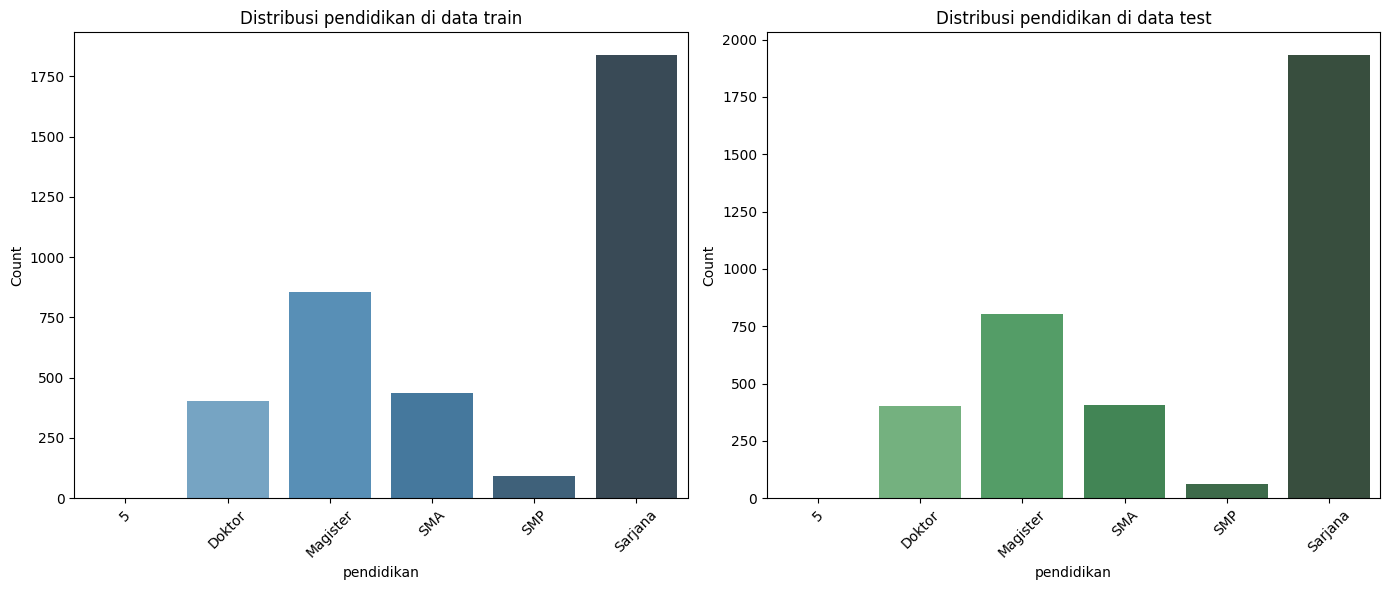

In [8]:
dfs = [(df_train['status_pernikahan'], 'train'), (df_test['status_pernikahan'], 'test')]

# Pengecekan distribusi status pernikahan di masing-masing dataset
for df, name in dfs:
    print(f'Distribusi kategori status_pernikahan di data {name}:')
    print(df.value_counts())
    print('-' * 40)

# Bar plot pendidikan
plt.figure(figsize=(14, 6))

train_pendidikan = df_train['pendidikan'].value_counts().sort_index()
test_pendidikan = df_test['pendidikan'].value_counts().sort_index()

plt.subplot(1, 2, 1)
sns.barplot(x=train_pendidikan.index, y=train_pendidikan.values, palette='Blues_d')
plt.title('Distribusi pendidikan di data train')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=test_pendidikan.index, y=test_pendidikan.values, palette='Greens_d')
plt.title('Distribusi pendidikan di data test')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Selanjutnya, hal yang sama juga diterapkan di variabel kategori status pernikahan. Kategori Rencana Menikah mendominasi pada kedua dataset dengan 1271 di data train dan 1272 di data test. Menikah menempati posisi kedua dengan 1114 di data train dan 1126 di data test. Akan tetapi, ada kategori yang tampaknya anomali, yaitu 5. Kategori ini hanya muncul 1 kali di kedua dataset. Ini mungkin disebabkan oleh kesalahan input atau masalah dengan data pengkodean. Hal ini perlu ditangani, misalnya dengan menggabungkannya ke kategori lain atau menghapusnya.

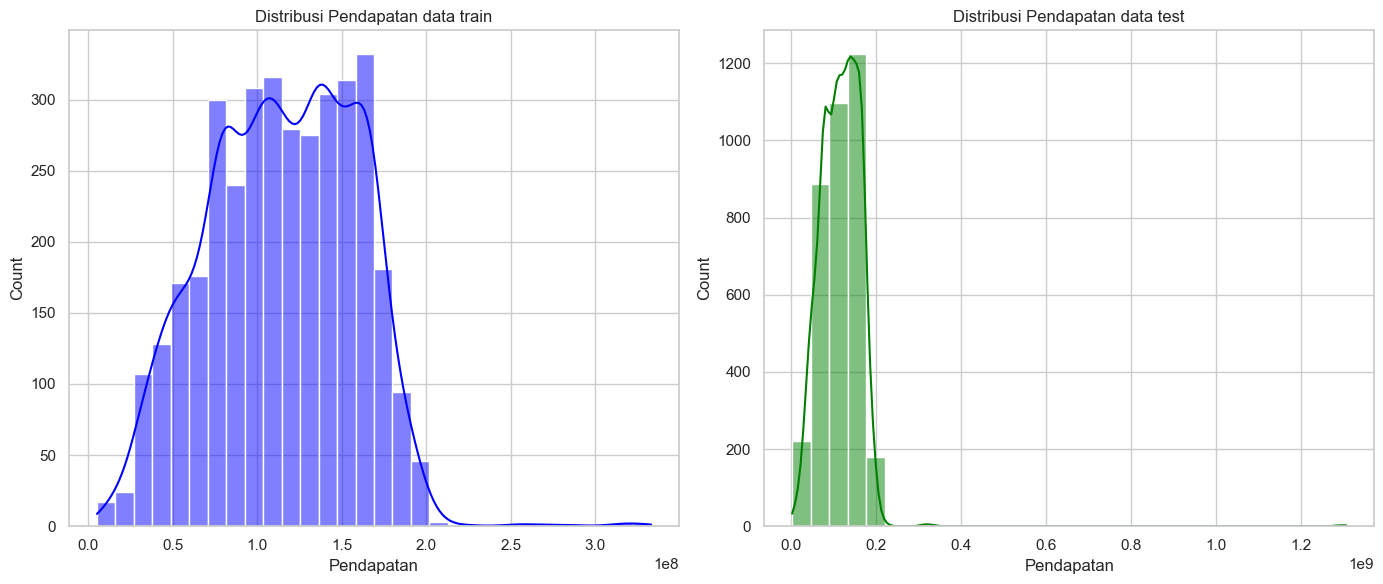

In [9]:
# Melihat distribusi pendapatan
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['pendapatan'], kde=True, color='blue', bins=30)
plt.title('Distribusi Pendapatan data train')
plt.xlabel('Pendapatan')

plt.subplot(1, 2, 2)
sns.histplot(df_test['pendapatan'], kde=True, color='green', bins=30)
plt.title('Distribusi Pendapatan data test')
plt.xlabel('Pendapatan')

plt.tight_layout()
plt.show()

Dari grafik diatas, saya dapat mengidentifikasi pendapatan tiap individu. Dari grafik diatas, distribusi terlihat sedikit miring ke kanan (right-skewed), dengan mayoritas data berada pada rentang pendapatan yang lebih rendah. Ini berarti bahwa sebagian besar individu dalam data memiliki pendapatan yang relatif lebih kecil.

ValueError: Could not interpret value `jumlah_promosi` for `x`. An entry with this name does not appear in `data`.

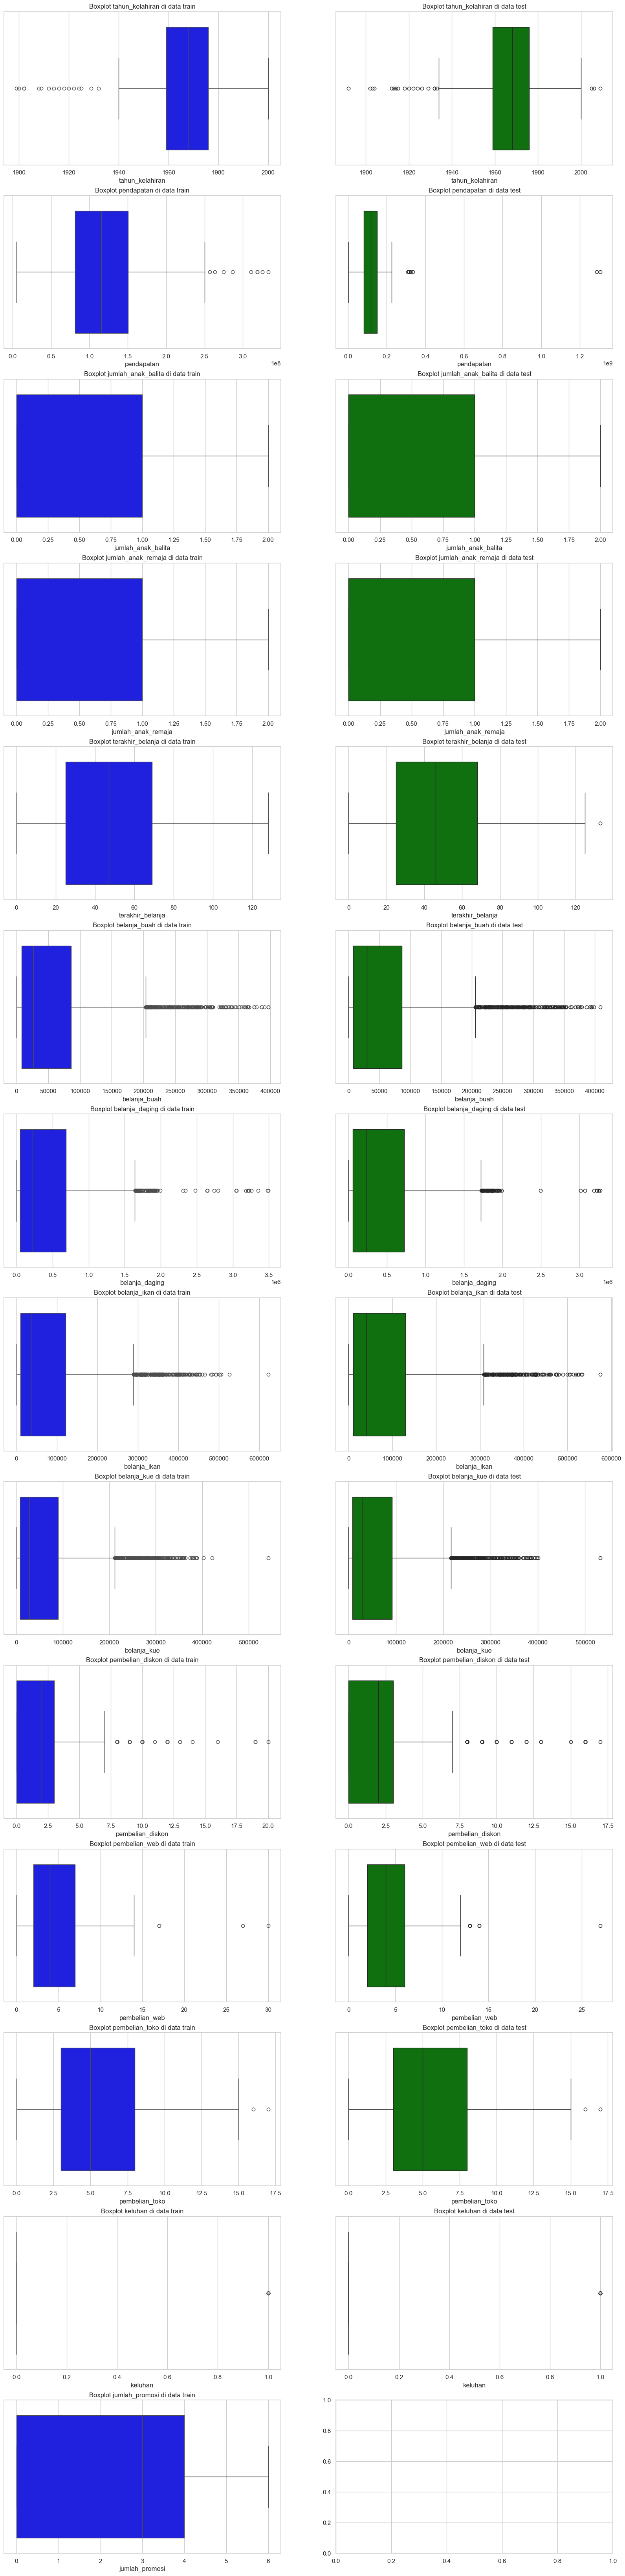

In [11]:
# Melihat outliers tiap variabel menggunakan boxplot
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, len(numeric_columns) * 6))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2*i - 1)
    sns.boxplot(data=df_train, x=col, color='blue')
    plt.title(f'Boxplot {col} di data train')

    plt.subplot(len(numeric_columns), 2, 2*i)
    sns.boxplot(data=df_test, x=col, color='green')
    plt.title(f'Boxplot {col} di data test')

plt.tight_layout()
plt.show()

Selanjutnya, saya ingin melihat outliers dari masing-masing variabel. Jika sebagian besar variabel menunjukkan distribusi yang serupa antara data train dan data test (median, IQR, dan jumlah outliers mirip), maka dapat memungkinkan model bekerja dengan baik saat diprediksi. Namun, jika variabel yang memiliki perbedaan distribusi yang signifikan, kita perlu melakukan beberapa penyesuaian, seperti normalisasi atau pemilihan fitur tambahan untuk menjaga performa model tetap baik.

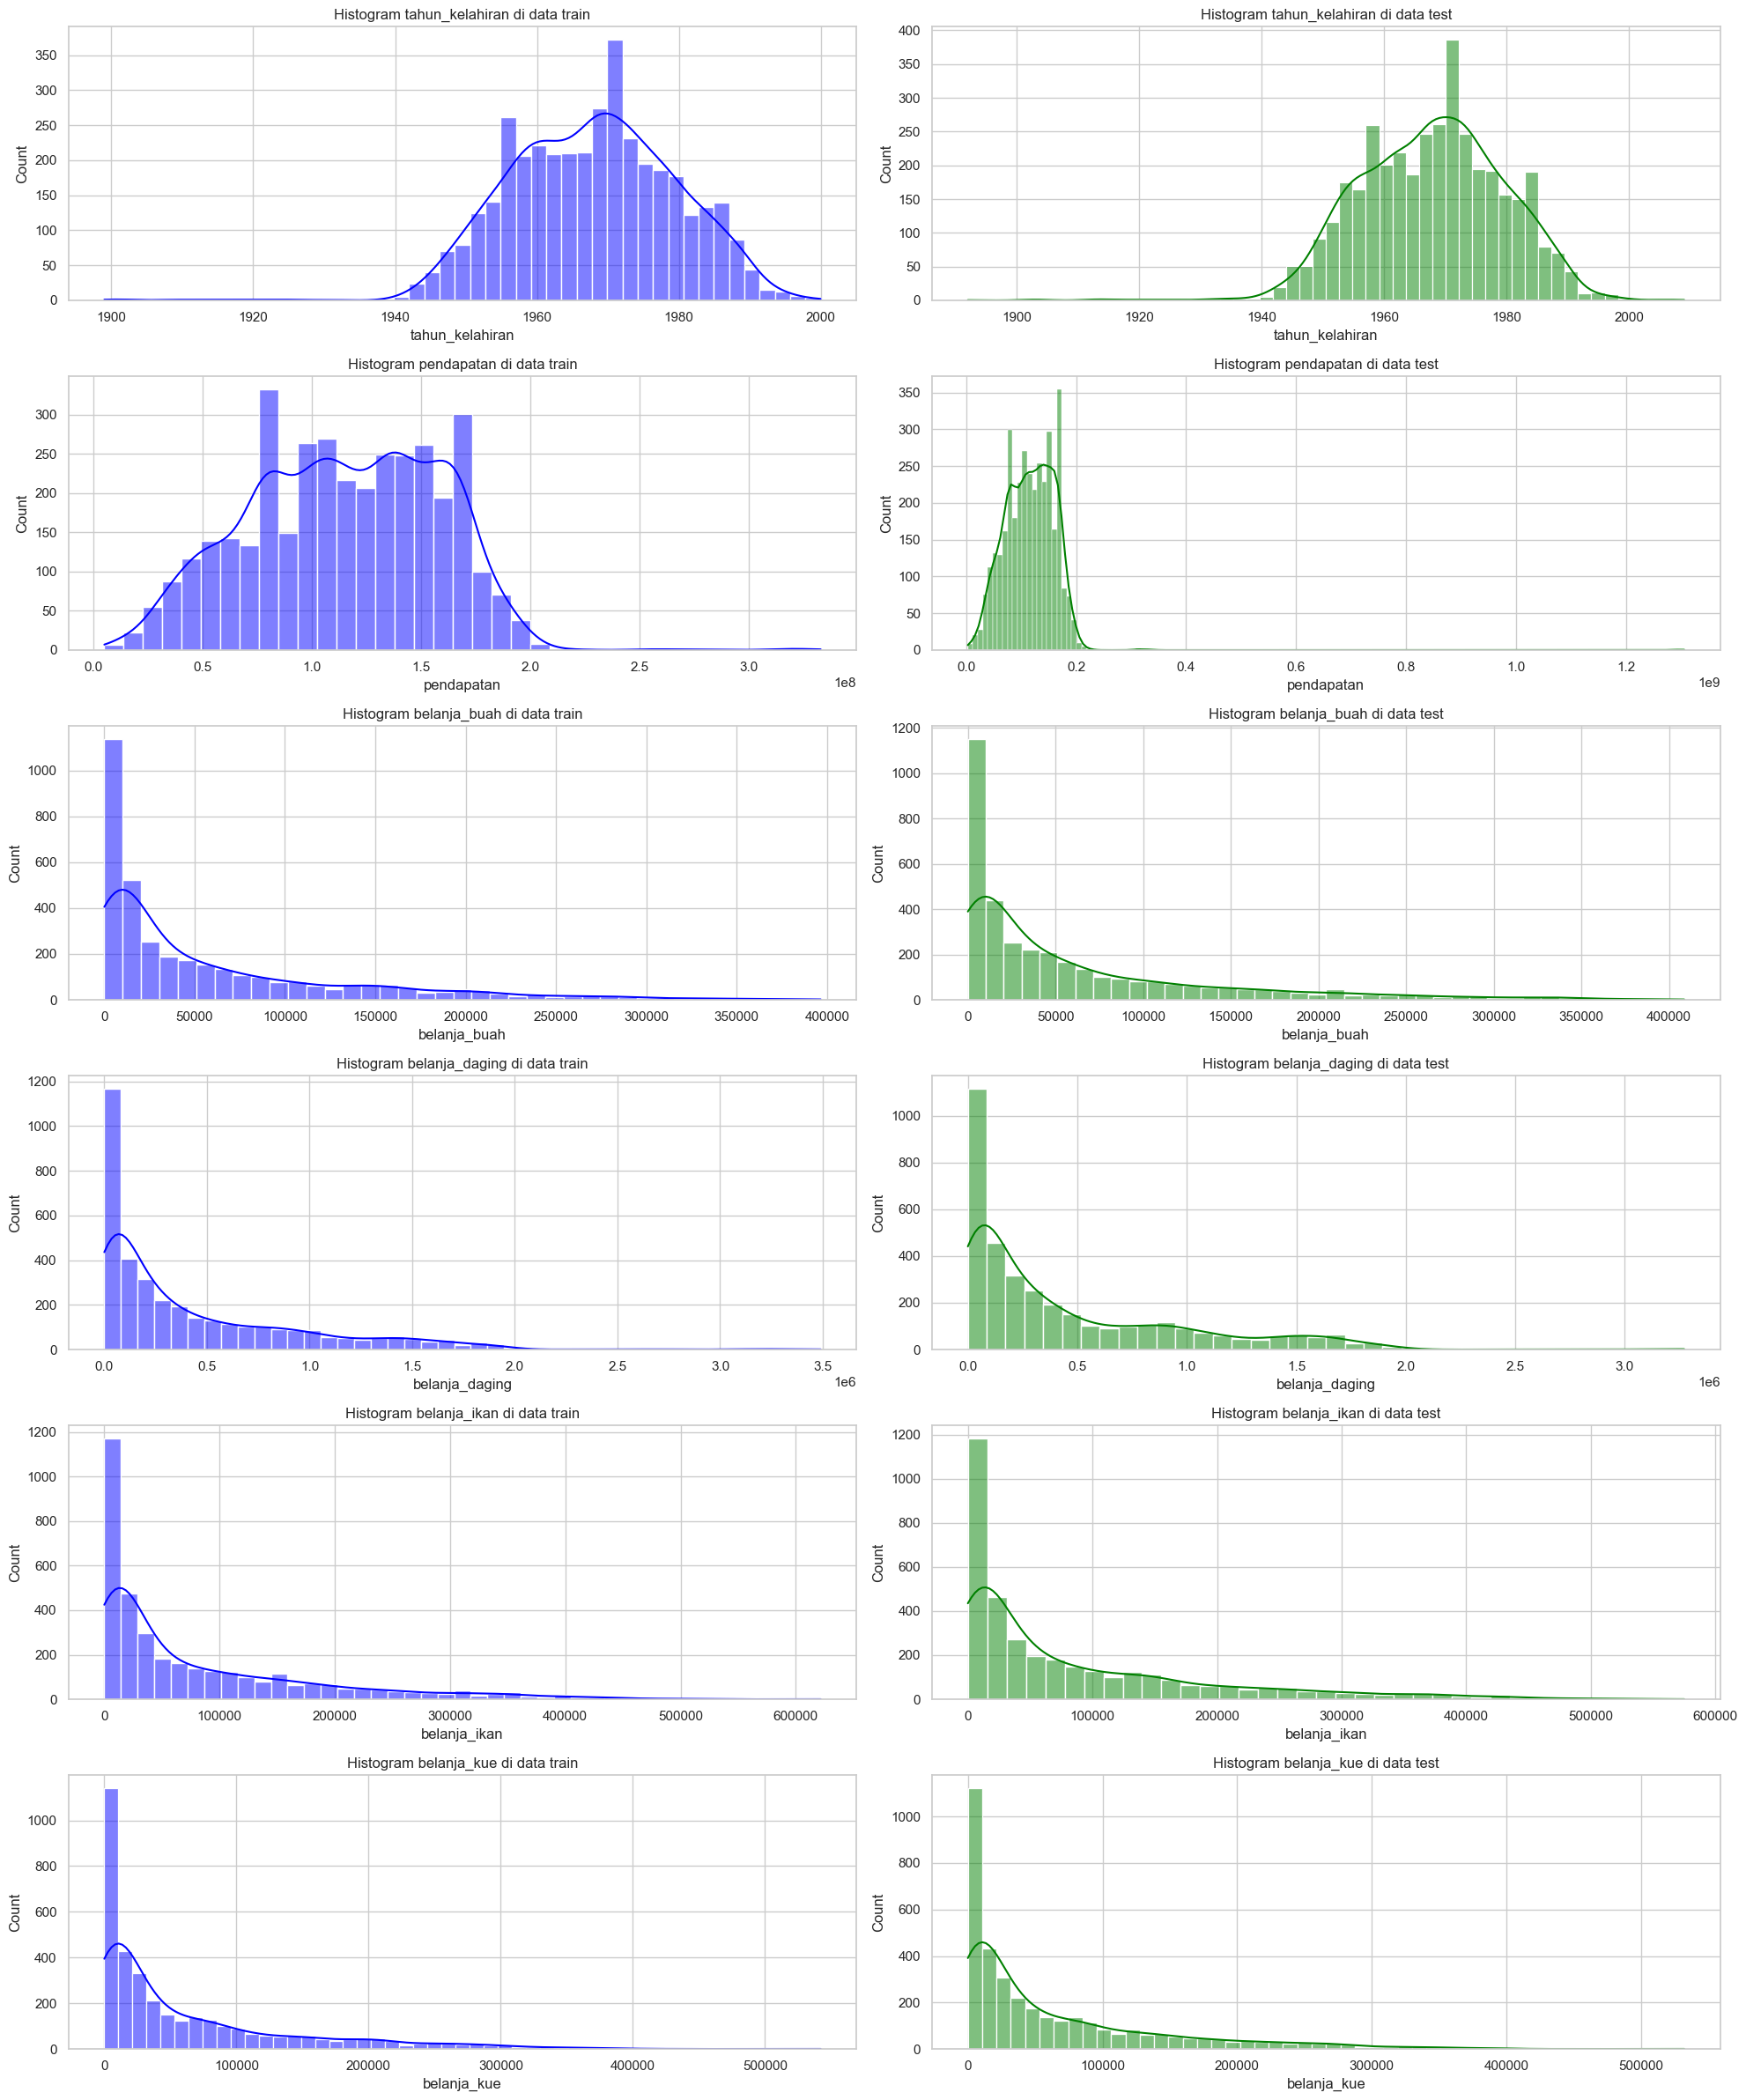

In [16]:
# Pilih kolom
selected_columns = ['tahun_kelahiran', 'pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']

# Histogram untuk data train
plt.figure(figsize=(20, len(selected_columns) * 4))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns), 2, 2*i - 1)
    sns.histplot(df_train[col], kde=True, color='blue')
    plt.title(f'Histogram {col} di data train')

# Histogram untuk data test
for i, col in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns), 2, 2*i)
    sns.histplot(df_test[col], kde=True, color='green')
    plt.title(f'Histogram {col} di data test')

plt.tight_layout()
plt.show()

Terakhir, saya ingin membandingkan distribusi data dari variabel yang relevan untuk dianalisis seperti tahun_kelahiran, pendapatan, belanja_buah, belanja_daging, belanja_ikan, dan belanja_kue menggunakan grafik histogram. Hampir semua variabel memiliki distribusi data yang mirip tetapi ada satu yang berbeda antara data train maupun data test yaitu pendapatan. Perlu dilakukan analisis lebih lanjut untuk memahami mengapa ada perbedaan dalam distribusi pendapatan antara data train dan data test. Apakah ada faktor luar yang mempengaruhi data seperti kebijakan ekonomi, demografi, atau regional.